In [1]:
from utils import *

In [2]:
#load and crap
img_r = read_img(path="pic//image2.tiff")
p1 = (800, 400)
p2 = (1200, 800)
img = crap_par_point_fix(img_r, p1, p2, False)
print(img)

800 1200 400 800
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


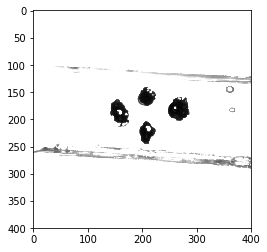

In [3]:
# show the image to analyse
plt.imshow(img,cmap="gray")

we have decided to analyse acording to the value of each pixel it's likely that we are going to treat a problem of classification, witch means that we have to decide if this point is "interesting" (ROI), but first of all i would like to take a look at its distribution

In [4]:
img_t=255-img
# attention that we take 1(white) for "there is someting" and 0(black) for "there is nothing"

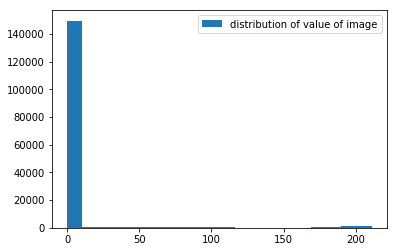

In [5]:
img_s = np.ravel(img_t)
plt.hist(img_s,bins=20,label="distribution of value of image")
plt.legend()
plt.show()

we notice that a pick apearing at about 0, which is reasonable cause we have a pure background, so we just delete those pixel in the background

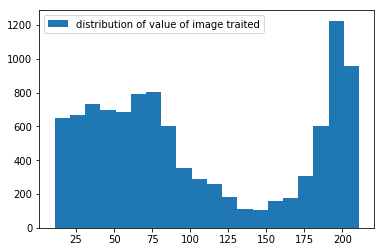

In [6]:
img_show=[pix for pix in img_s if pix > 10]
plt.hist(img_show, bins=20, label="distribution of value of image traited")
plt.legend()
plt.show()

this time we got 2 distinguished picks. you can analyse these two picks to get the exact prediction of two values (by using GMM). However our mission today is just removing all the noises, as for the pixels of interest, we have already enough.

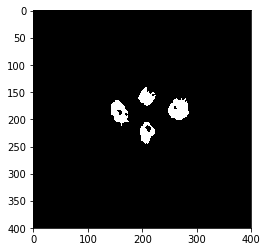

In [7]:
img_t[img_t <= 155] = 0
img_t[img_t > 155] = 1
plt.imshow(img_t,cmap="gray")

142 176 164 213
247 287 159 202
192 225 141 176
195 224 204 245


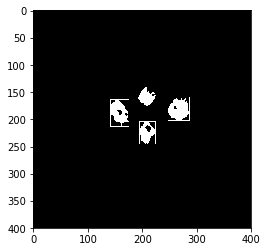

In [8]:
img_com=np.array(img_t)
masks = get_all_masks(img_t)
for i, mask in enumerate(masks):
    img_com = mask.get_contour(img_com)
plt.imshow(img_com ,cmap="gray")
#plt.imshow(img_t ,cmap="gray")